
1.	Construct a simple model to predict: a) the across-shelf set-up/set-down, and b) the strength of the wave-driven along-shore current within the surf zone, based on gradients in radiation stress for waves propagating from deep water to a shoreline.  

In [48]:
import numpy as np
import wave_model as wm
import matplotlib.pyplot as plt

Setup an initial wave at each period and setup the test depths as an array.

In [49]:
#5, 10, 15 second period waves with an amplitude of 0.5 meters
wave5 = wm.wave_solver(5,300,1)
wave10 = wm.wave_solver(10,300,1)
wave15 = wm.wave_solver(15,300,1)

#testing depths every 5 meters between 5m and 300m
test_depths = []
for i in range(1,301,2):#5-300 at 5 ft intervals
    test_depths.append(i)

Calculate the wave heights, cycling through each incident angle for all depths

In [50]:
#setup dictionaries to store test results
wave5_heights={"angle 30":[],"angle 45":[],"angle 60":[]}
wave10_heights={"angle 30":[],"angle 45":[],"angle 60":[]}
wave15_heights={"angle 30":[],"angle 45":[],"angle 60":[]}

#cycle through all depths
for depth in test_depths:
    shoal_coefficient5 = wave5.shoaling_coefficient(depth)
    shoal_coefficient10 = wave10.shoaling_coefficient(depth)
    shoal_coefficient15 = wave15.shoaling_coefficient(depth)

    #angles to test waves
    angle_names = ["angle 30","angle 45","angle 60"];angles=[30,45,60]#measuring input angle to perpendicular

    #cycle through angles 30, 45, 60
    for i in range(len(angles)):
        #calculate heights for each wave
        ref_coefficient5 = wave5.refraction_coefficient(angles[i],depth)
        wave5_heights[angle_names[i]].append(wave5.initial_amplitude * 2 * shoal_coefficient5 / ref_coefficient5)
        
        ref_coefficient10 = wave10.refraction_coefficient(angles[i],depth)
        wave10_heights[angle_names[i]].append(wave10.initial_amplitude * 2 * shoal_coefficient10  / ref_coefficient10)
        
        
        ref_coefficient15 = wave15.refraction_coefficient(angles[i],depth)
        wave15_heights[angle_names[i]].append(wave15.initial_amplitude * 2 * shoal_coefficient15 / ref_coefficient15)

Generate Charts for each wave period showing comparative effects of shoaling and refraction

No handles with labels found to put in legend.


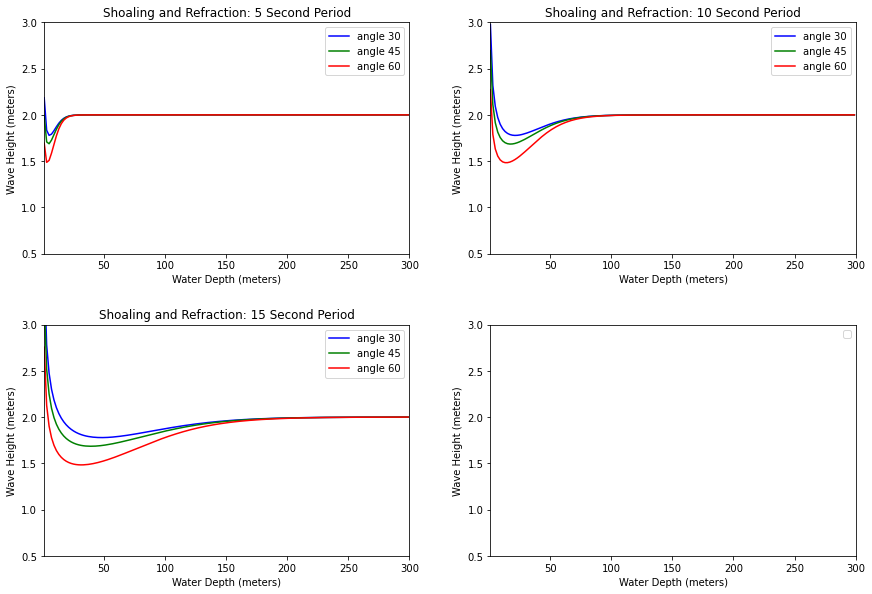

In [51]:
fig, ((axs1, axs2), (axs3, axs4)) = plt.subplots(2, 2,figsize=(12, 8))
fig.tight_layout(h_pad=5,w_pad=5)

axs1.set_title("Shoaling and Refraction: 5 Second Period")
axs2.set_title("Shoaling and Refraction: 10 Second Period")
axs3.set_title("Shoaling and Refraction: 15 Second Period")

colors = ["blue","green","red"]
#cycle through angles 30, 45, 60
for i in range(len(angles)):
    axs1.plot(test_depths, wave5_heights[angle_names[i]],color=colors[i],label=angle_names[i])
    axs2.plot(test_depths, wave10_heights[angle_names[i]],color=colors[i],label=angle_names[i])
    axs3.plot(test_depths, wave15_heights[angle_names[i]],color=colors[i],label=angle_names[i])

for axs in fig.get_axes():
    axs.set(xlabel="Water Depth (meters)", ylabel="Wave Height (meters)")
    axs.set_ylim(0.5, 3)
    axs.set_xlim(1, 300)
    axs.legend(loc='upper right')
    
plt.show()

No handles with labels found to put in legend.


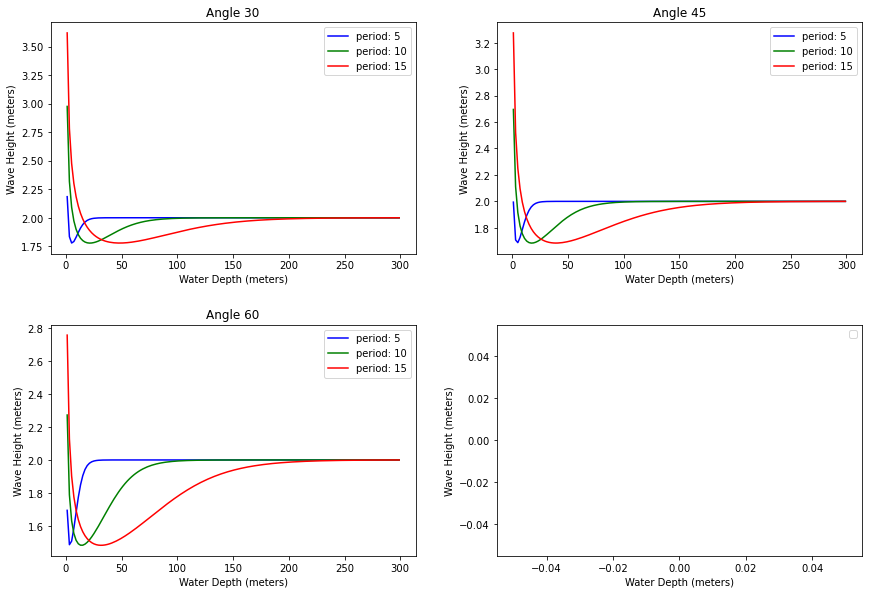

In [53]:
fig, ((axs1, axs2), (axs3, axs4)) = plt.subplots(2, 2,figsize=(12, 8))
fig.tight_layout(h_pad=5,w_pad=5)

axs1.set_title("Angle 30")
axs2.set_title("Angle 45")
axs3.set_title("Angle 60")

colors = ["blue","green","red","purple"]
#cycle through angles 30, 45, 60
my_axes = fig.get_axes()
for i in range(3):
    my_axes[i].plot(test_depths, wave5_heights[angle_names[i]],color=colors[0],label="period: 5")
    my_axes[i].plot(test_depths, wave10_heights[angle_names[i]],color=colors[1],label="period: 10")
    my_axes[i].plot(test_depths, wave15_heights[angle_names[i]],color=colors[2],label="period: 15")

for axs in fig.get_axes():
    axs.set(xlabel="Water Depth (meters)", ylabel="Wave Height (meters)")
    axs.autoscale()
    axs.legend(loc='upper right')
    
plt.show()

For the purposes of this exercise, assume that the surf zone is defined as the region landward of where wave breaking begins and that the wave height within the surf zone is depth-limited (e.g. H=h).  Assume planar bathymetry with a constant slope and with no variations in the along-coast direction.  

For both a) and b) compare your results for wave periods of 5, 10, and 15 seconds and for deep water wave angles (0) of 30, 45 and 60 degrees.  You will need to account for the impact that both shoaling and refraction have on the waves as they propagate from deep water towards the coast because these two processes impact wave height (and hence depth at breaking and local wave energy) and local wave angle () within the surf zone.   

Assume that the offshore wave height is 2m, the bottom drag coefficient (Cd) is 0.01, the bottom slope is 0.001 and =0.8. 

In [54]:
print(wave5_heights)

{'angle 30': [2.18476234985421, 1.83434321850945, 1.77876105504583, 1.79187680434956, 1.82904834780314, 1.87165876988382, 1.91020441253278, 1.94062019086364, 1.96242258144138, 1.97699550403678, 1.98625776584313, 1.99193749139409, 1.99533282427700, 1.99732573660987, 1.99847984564845, 1.99914141642008, 1.99951763718677, 1.99973021496691, 1.99984969115439, 1.99991653887277, 1.99995379536998, 1.99997448908566, 1.99998594854711, 1.99999227730521, 1.99999576402950, 1.99999768075675, 1.99999873231075, 1.99999930815516, 1.99999962296307, 1.99999979479741, 1.99999988845621, 1.99999993943700, 1.99999996715258, 1.99999998220262, 1.99999999036617, 1.99999999478981, 1.99999999718459, 1.99999999847985, 1.99999999917983, 1.99999999955781, 1.99999999976176, 1.99999999987172, 1.99999999993097, 1.99999999996288, 1.99999999998005, 1.99999999998928, 1.99999999999424, 1.99999999999691, 1.99999999999834, 1.99999999999911, 1.99999999999952, 1.99999999999974, 1.99999999999986, 1.99999999999993, 1.999999999999

 For part a), please discuss the basic across-shore pattern of set-up and set-down and how this is impacted by wave period and the deep-water wave angle in your model.  Be sure to explain why your results are different for different periods and angles.  What are the implications of the predicted set-up/set-down for the across-shelf circulation? 

For part b), discuss how the strength of the along-shore wave-driven current varies as a function of both wave period and the deep-water angle. Why does wave period impact the predicted current?  Using words (and equations if helpful), explain the basic physical processes that drive the predicted current.  What are the implications for along-shore sediment transport?